<a href="https://colab.research.google.com/github/NazmulHassan033/Nazmul-Hassan/blob/main/No_Reduction_Speech_Dataset_2_parkinsons_disease_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

from xgboost import XGBClassifier

In [ ]:
import os
for dirname, _, filenames in os.walk('../F:/Thesis Folder/Thesis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read the data

In [ ]:
#  let’s read the data into a DataFrame

#Read the data
df=pd.read_csv('pd_speech_features.csv')
print(df.shape,'\n')
df.head()

(756, 755) 



,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
# descrive the data

df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [ ]:
#  To know how many rows and cols and NA values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to status
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
#  shape of the dataset

df.shape

(756, 755)

In [ ]:
#Get the features and labels
X_un=df.copy()
X_un=X_un.drop(['id','gender','status'],axis=1)
y_un=df[['status']]

In [ ]:
#0 is healthy 1 is parkison affected
y_un.value_counts()

status
1         564
0         192
dtype: int64

<Axes: ylabel='status'>

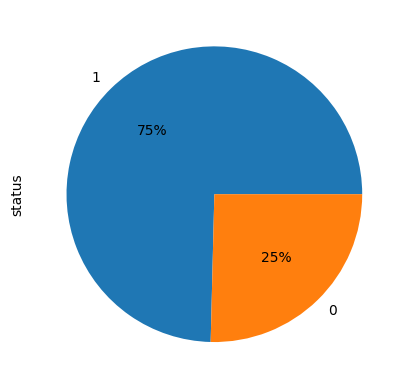

In [ ]:
df['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

<Axes: >

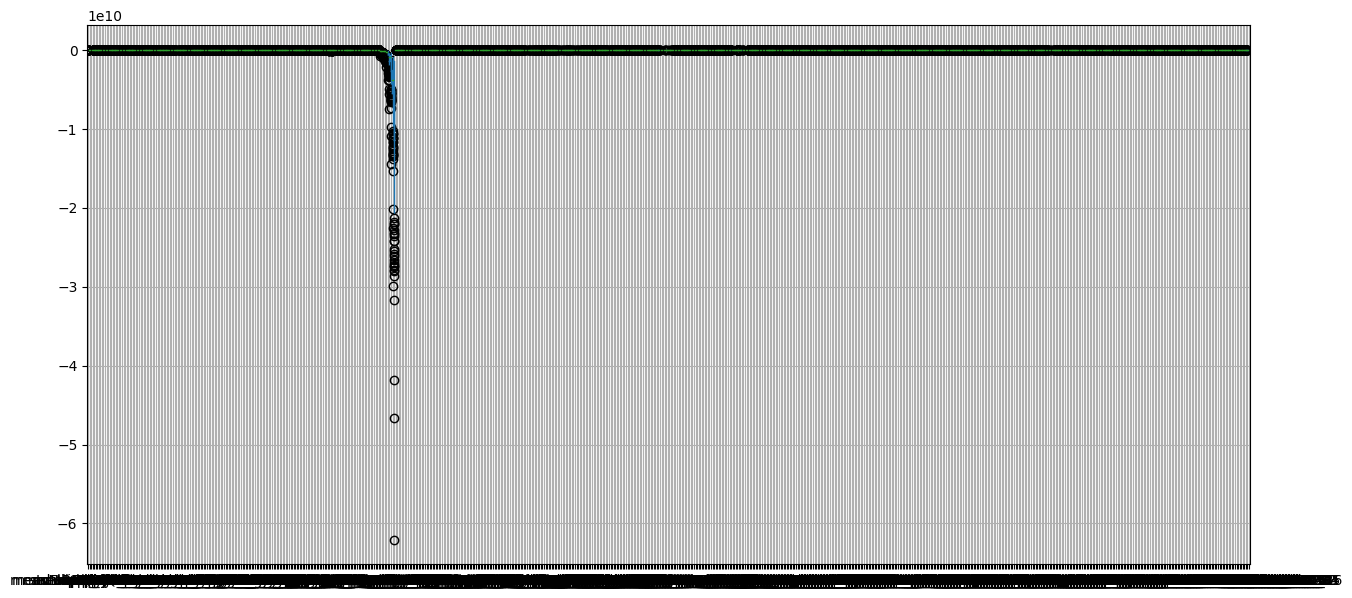

In [ ]:
X_un.boxplot(figsize=(15,7))

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=24)

for train_index,test_index in split.split(X_un,y_un):
    strat_train_set_x,strat_train_y=X_un.loc[train_index],y_un.loc[train_index]
    strat_test_set_x,strat_test_y=X_un.loc[test_index],y_un.loc[test_index] #completely unseen to our classifier

In [ ]:
print(strat_train_set_x.shape,strat_train_y.shape)
print(strat_test_set_x.shape,strat_test_y.shape)

(604, 752) (604, 1)
(152, 752) (152, 1)


# without cross validation and without scaling

In [ ]:
#Train the model
from sklearn.metrics import precision_score, accuracy_score,recall_score
model=XGBClassifier(use_label_encoder=False,eval_metric='rmse')
model.fit(strat_train_set_x,strat_train_y)
y_pred=model.predict(strat_test_set_x)

print('accuracy score %.2f'% accuracy_score(y_pred,strat_test_y))
print('recall score %.2f'%recall_score(y_pred,strat_test_y))


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


accuracy score 0.90
recall score 0.90


In [ ]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_pred,strat_test_y)

print("\nClassification Report:")
print(classification_report(y_pred,strat_test_y))

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        28
           1       0.98      0.90      0.94       124

    accuracy                           0.90       152
   macro avg       0.82      0.91      0.86       152
weighted avg       0.92      0.90      0.91       152



Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        28
           1       0.98      0.90      0.94       124

    accuracy                           0.90       152
   macro avg       0.82      0.91      0.86       152
weighted avg       0.92      0.90      0.91       152



<Axes: >

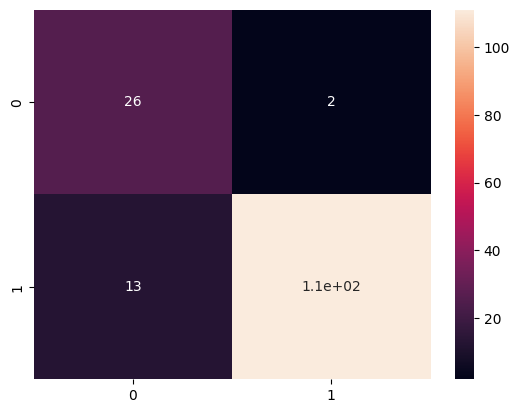

In [ ]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_pred,strat_test_y)

print("\nClassification Report:")
print(classification_report(y_pred,strat_test_y))


import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Using ANN

In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Set Configurations and read data

In [ ]:
SEED = 42
EPOCHS = 300
BATCH_SIZE = 32

#df = pd.read_csv('../input/parkinsons-disease-data-set/parkinsons.data')

In [ ]:
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

# EDA

In [ ]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df = df.drop(['id','gender'], axis=1)

train_df, test_df = train_test_split(df,
                                     test_size=0.2,
                                     random_state=SEED)
train_df, val_df = train_test_split(train_df,
                                    test_size=0.2,
                                    random_state=SEED)


X_train = train_df.drop('status', axis=1).values.astype('float32')
y_train = train_df['status'].values.astype('int32')
X_val = val_df.drop('status', axis=1).values.astype('float32')
y_val = val_df['status'].values.astype('int32')
X_test = test_df.drop('status', axis=1).values.astype('float32')
y_test = test_df['status'].values.astype('int32')

mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train)
X_val = mmsc.transform(X_val)
X_test = mmsc.transform(X_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Build the model

In [ ]:
shape = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential()
model.add(Input((shape,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = tfa.optimizers.RectifiedAdam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               96384     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 121,282
Trainable params: 121,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/300
16/16 [==============================] - 2s 22ms/step - loss: 0.7401 - accuracy: 0.3602 - val_loss: 0.6339 - val_accuracy: 0.7603
Epoch 2/300
16/16 [==============================] - 0s 7ms/step - loss: 0.5925 - accuracy: 0.7391 - val_loss: 0.5603 - val_accuracy: 0.7603
Epoch 3/300
16/16 [==============================] - 0s 8ms/step - loss: 0.5602 - accuracy: 0.7412 - val_loss: 0.5231 - val_accuracy: 0.7603
Epoch 4/300
16/16 [==============================] - 0s 8ms/step - loss: 0.5269 - accuracy: 0.7412 - val_loss: 0.4815 - val_accuracy: 0.7603
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: 0.4924 - accuracy: 0.7495 - val_loss: 0.4512 - val_accuracy: 0.8264
Epoch 6/300
16/16 [==============================] - 0s 7ms/step - loss: 0.4801 - accuracy: 0.7723 - val_loss: 0.4058 - val_accuracy: 0.8678
Epoch 7/300
16/16 [==============================] - 0s 7ms/step - loss: 0.4387 - accuracy: 0.8095 - val_loss: 0.3842 - val_accuracy: 0.9091
Epoch 8/300


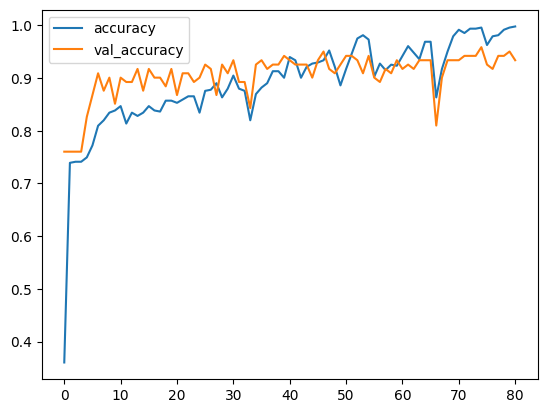

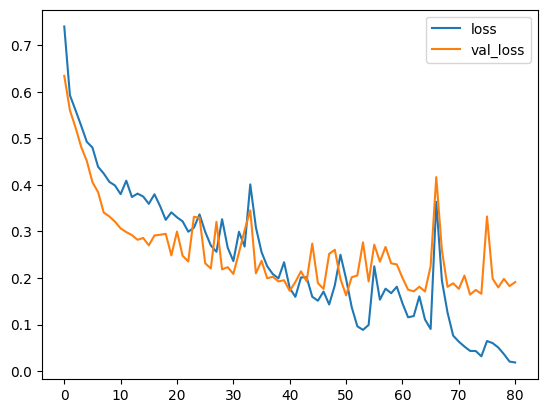

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8684


[0.3791869282722473, 0.8684210777282715]

# Using RF

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  let’s read the data into a DataFrame

#Read the data
#df=pd.read_csv('../input/parkinsons-disease-data-set/parkinsons.data')
print(df.shape,'\n')
df.head()

(195, 23) 



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(df.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [ ]:
print("Original shape of data: ", df.shape)
X = df.drop(['status'], axis=1)
print("Featues shape:", X.shape)
y = df.status
print("Target shape: ", y.shape)

Original shape of data:  (195, 23)
Featues shape: (195, 22)
Target shape:  (195,)


In [ ]:
scaler = MinMaxScaler((-1, 1))

# fits the data normally
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Prediction on Test and Train Set
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

In [ ]:
print("Training Accuracy: ", accuracy_score(y_train, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_logistic_test))

Training Accuracy:  0.8589743589743589
Test Accuracy:  0.8974358974358975


Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



<Axes: >

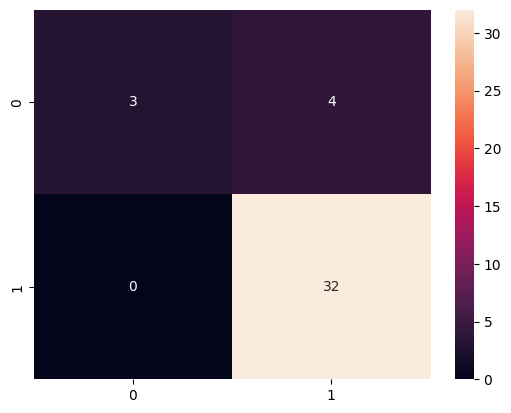

In [ ]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_test, pred_logistic_test)

print("\nClassification Report:")
print(classification_report(y_test, pred_logistic_test))


import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
dt = DecisionTreeClassifier()

# Train model
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [ ]:
print("Training Accuracy: ", accuracy_score(y_train, pred_dt_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_dt_test))

Training Accuracy:  1.0
Test Accuracy:  0.9230769230769231


Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



<Axes: >

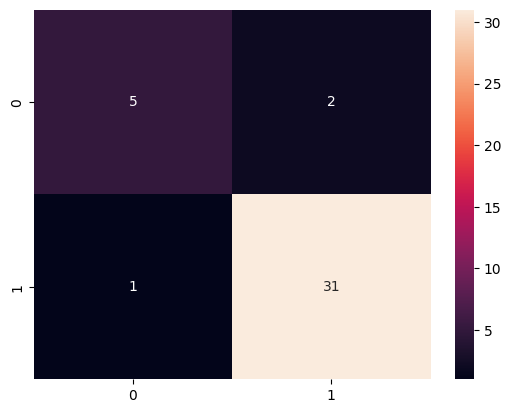

In [ ]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_test, pred_dt_test)

print("\nClassification Report:")
print(classification_report(y_test, pred_dt_test))


import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_dt_test))

print("\nClassification Report:")
print(classification_report(y_test, pred_dt_test))

Confusion Matrix: 
[[ 5  2]
 [ 1 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

In [ ]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.9487179487179487


In [ ]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_test, pred_rf)

print("\nClassification Report:")
print(classification_report(y_test, pred_rf))

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



<Axes: >

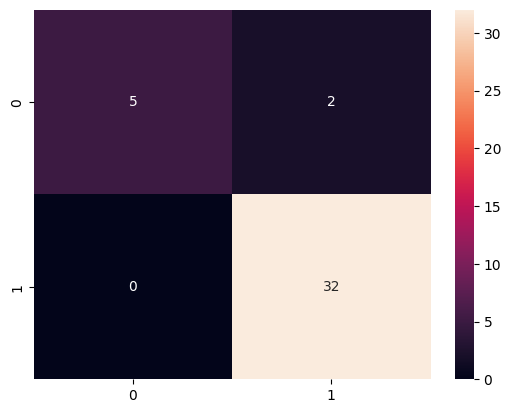

In [ ]:

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)